#  Music Recommendation System using Clustering

# Problem  Statement

The goal of this project is to use cluster analysis to group users based on their music preferences and recommend songs that match their tastes. Cluster analysis is a technique that partitions data into meaningful groups based on some features or attributes. In this case, the features could include artist names, genres,etc. The clusters would represent different types of music listeners who have similar preferences. By identifying the clusters, we can suggest songs that belong to the same cluster as the user’s favorite songs or artists. This way, we can provide personalized and relevant recommendations that enhance the user’s music experience.

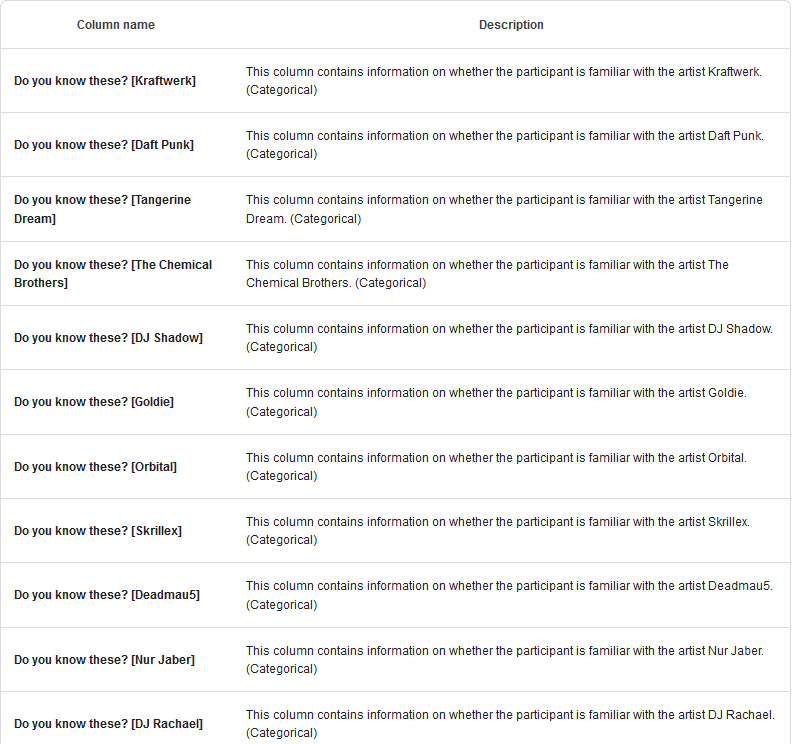  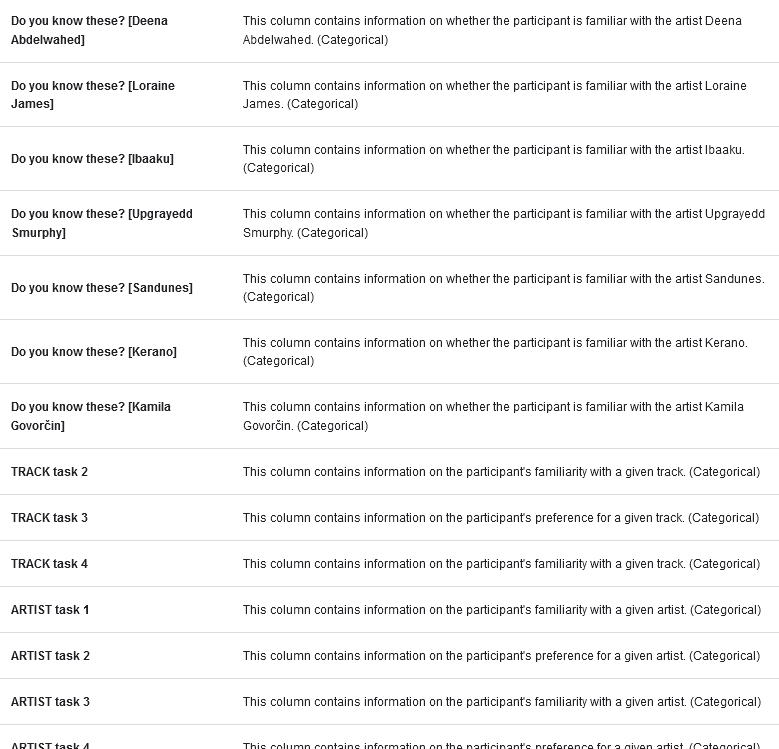 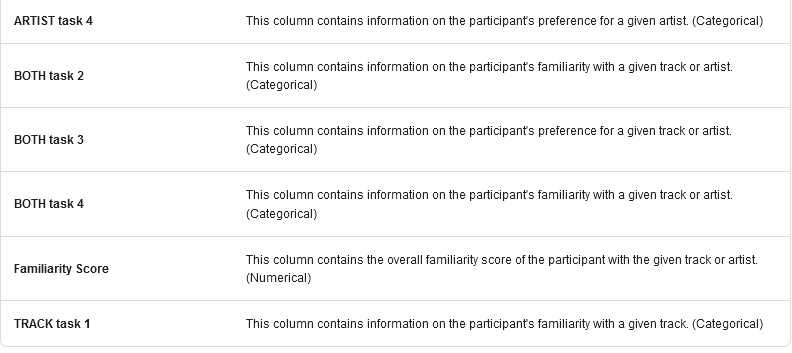

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv('Data_Release_v-0.2.csv')
df=pd.DataFrame(df)

In [3]:
df.isnull().sum()

Participant ID                                                              0
Age                                                                         0
Gender                                                                      0
\nskin type?                                                                0
Location                                                                    5
                                                                           ..
BOTH task 2                                                                 0
BOTH task 3                                                                 0
BOTH task 4                                                                 0
Looking back at your choices, \nIndicate what influenced you the most..1    0
Looking back at your choices, \nWhich one did you weight the most           0
Length: 68, dtype: int64

In [4]:
df.shape

(115, 68)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 68 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Participant ID                                                                                                              115 non-null    int64  
 1   Age                                                                                                                         115 non-null    object 
 2   Gender                                                                                                                      115 non-null    object 
 3   
skin type?                                                                                                                 1

In [6]:
df.drop('Participant ID',axis=1,inplace=True) #useless data

## EDA

### I'm doing EDA on columns individually,i will also be doing some adjustments like labelencoding,adjusting null values,removing unnecessary columns etc 

## Age

In [7]:
df.Age.isnull().sum()

0

In [8]:
df.Age.value_counts()

25-34 years old        50
35-44 years old        34
18-24 years old        20
45-54 years old         9
55-64 years old         1
I prefer not to say     1
Name: Age, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

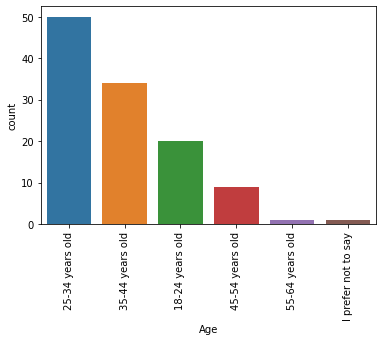

In [9]:
plt.xticks(rotation=90)
sns.countplot(df.Age)

In [10]:
color_n = {'18-24 years old':1,'25-34 years old':2,'35-44 years old':3,'45-54 years old':4,'55-64 years old':5,'I prefer not to say':0}
df['Age']=df['Age'].map(color_n)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

## Gender

In [11]:
df.Gender.isnull().sum()

0

In [12]:
df.Gender.value_counts()

Male                   84
Female                 20
I prefer not to say    11
Name: Gender, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

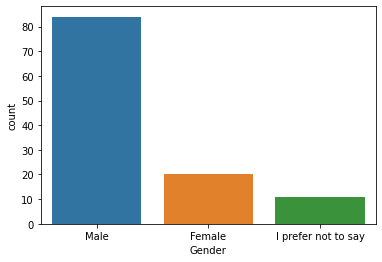

In [13]:
sns.countplot(df.Gender)

In [14]:
mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].replace('I prefer not to say', mode)


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

## skin type

In [16]:
df['\nskin type?'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='\nskin type?', ylabel='count'>

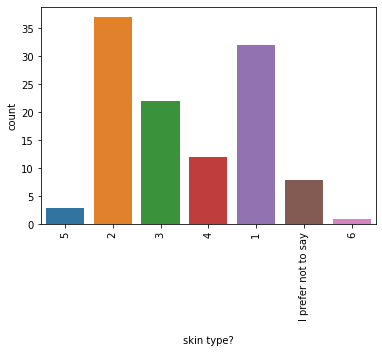

In [17]:
plt.xticks(rotation=90)
sns.countplot(df['\nskin type?'])

In [18]:
mode = df['\nskin type?'].mode()[0]
df['\nskin type?'] = df['\nskin type?'].replace('I prefer not to say', mode)


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['\nskin type?'] = le.fit_transform(df['\nskin type?'])

## Location

In [20]:
df.Location.isnull().sum()

5

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

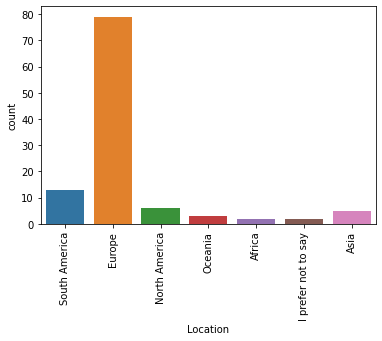

In [21]:
plt.xticks(rotation=90)
sns.countplot(df.Location)

In [22]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)


In [23]:
mode = df['Location'].mode()[0]
df['Location'] = df['Location'].replace('I prefer not to say', mode)


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

## Qualification

In [25]:
df.Qualification.isnull().sum()

1

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Qualification', ylabel='count'>

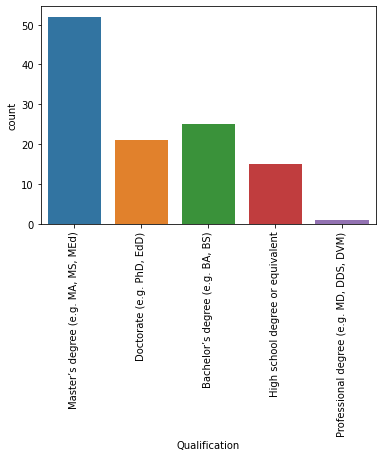

In [26]:
plt.xticks(rotation=90)
sns.countplot(df.Qualification)

In [27]:
df['Qualification'].fillna(df['Qualification'].mode()[0], inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Qualification'] = le.fit_transform(df['Qualification'])

## Musical_training

In [29]:
df.Musical_training.isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Musical_training', ylabel='count'>

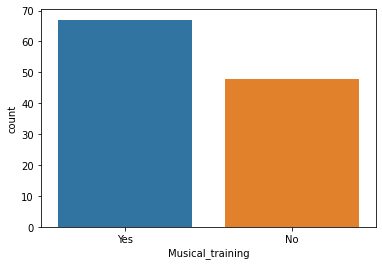

In [30]:
sns.countplot(df.Musical_training)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Musical_training'] = le.fit_transform(df['Musical_training'])

In [31]:
color_n = {'Yes':1,'No':0}
df['Musical_training']=df['Musical_training'].map(color_n)

## produce_music?

In [32]:
df['produce_music? '].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='produce_music? ', ylabel='count'>

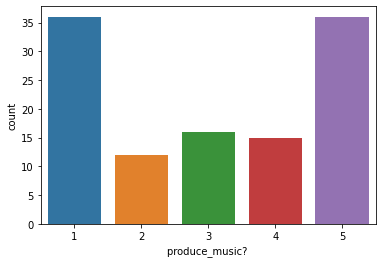

In [33]:
sns.countplot(df['produce_music? '])

## Would you describe \nYour musical taste as varied?

In [34]:
df['Would you describe \nYour musical taste as varied?'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Would you describe \nYour musical taste as varied?', ylabel='count'>

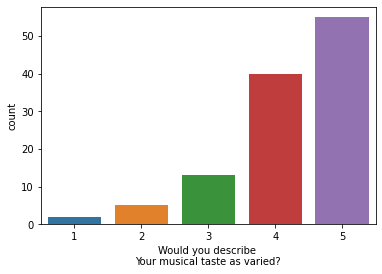

In [35]:
sns.countplot(df['Would you describe \nYour musical taste as varied?'])

## Do you often \nListen to Electronic Music?

In [36]:
df['Do you often \nListen to Electronic Music?'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Do you often \nListen to Electronic Music?', ylabel='count'>

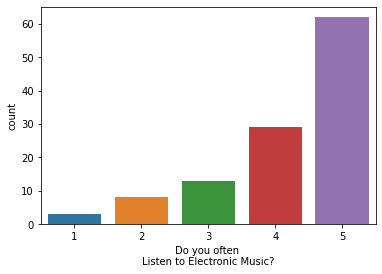

In [37]:
sns.countplot(df['Do you often \nListen to Electronic Music?'])

## Within Electronic music, \nWould you describe your musical taste as varied?

In [38]:
df['Within Electronic music, \nWould you describe your musical taste as varied?'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Within Electronic music, \nWould you describe your musical taste as varied?', ylabel='count'>

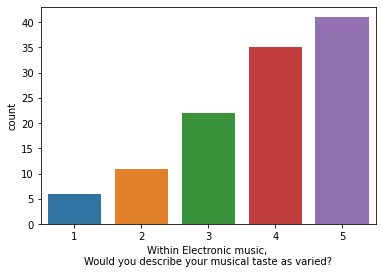

In [39]:
sns.countplot(df['Within Electronic music, \nWould you describe your musical taste as varied?'])

## Kraftwerk

In [40]:
df.Kraftwerk.isnull().sum()

0

In [41]:
df.Kraftwerk.value_counts()

I know them/her/him          97
I don't know them/her/him    15
Maybe I know them/her/him     3
Name: Kraftwerk, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kraftwerk', ylabel='count'>

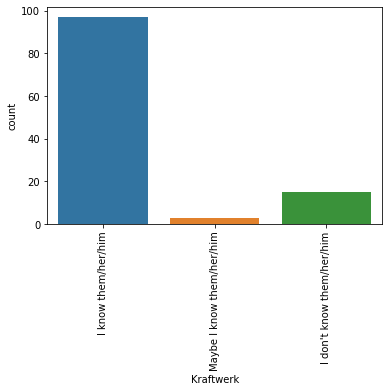

In [42]:
plt.xticks(rotation=90)
sns.countplot(df.Kraftwerk)

In [43]:
mode = df['Kraftwerk'].mode()[0]
df['Kraftwerk'] = df['Kraftwerk'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Kraftwerk'] = le.fit_transform(df['Kraftwerk'])

In [44]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Kraftwerk']=df['Kraftwerk'].map(color_n)

## Daft Punk

In [45]:
df['Daft Punk'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daft Punk', ylabel='count'>

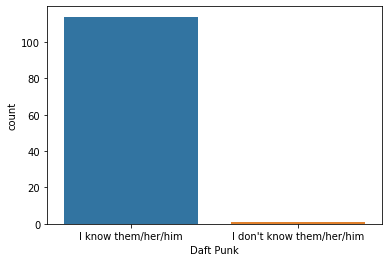

In [46]:
sns.countplot(df['Daft Punk'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Daft Punk'] = le.fit_transform(df['Daft Punk'])

In [47]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Daft Punk']=df['Daft Punk'].map(color_n)

## Tangerine Dream

In [48]:
df['Tangerine Dream'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tangerine Dream', ylabel='count'>

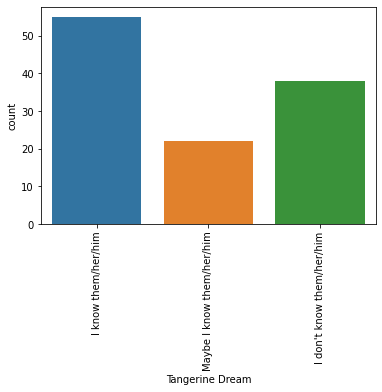

In [49]:
plt.xticks(rotation=90)
sns.countplot(df['Tangerine Dream'])

In [50]:
mode = df['Tangerine Dream'].mode()[0]
df['Tangerine Dream'] = df['Tangerine Dream'].replace('Maybe I know them/her/him', mode)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Tangerine Dream'] = le.fit_transform(df['Tangerine Dream'])

In [51]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Tangerine Dream']=df['Tangerine Dream'].map(color_n)

## The Chemical Brothers

In [52]:
df['The Chemical Brothers'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='The Chemical Brothers', ylabel='count'>

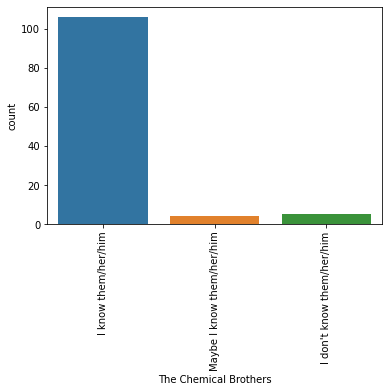

In [53]:
plt.xticks(rotation=90)
sns.countplot(df['The Chemical Brothers'])

In [54]:
mode = df['The Chemical Brothers'].mode()[0]
df['The Chemical Brothers'] = df['The Chemical Brothers'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['The Chemical Brothers'] = le.fit_transform(df['The Chemical Brothers'])

In [55]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['The Chemical Brothers']=df['The Chemical Brothers'].map(color_n)

## DJ Shadow

In [56]:
df['DJ Shadow'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DJ Shadow', ylabel='count'>

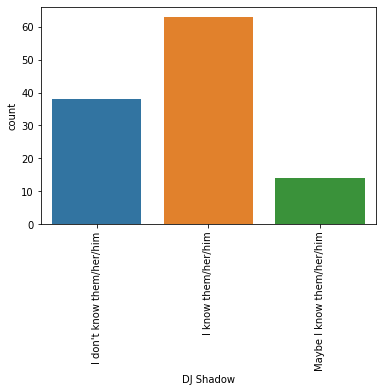

In [57]:
plt.xticks(rotation=90)
sns.countplot(df['DJ Shadow'])

In [58]:
mode = df['DJ Shadow'].mode()[0]
df['DJ Shadow'] = df['DJ Shadow'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DJ Shadow'] = le.fit_transform(df['DJ Shadow'])

In [59]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['DJ Shadow']=df['DJ Shadow'].map(color_n)

## Aphex Twin

In [60]:
df['Aphex Twin'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aphex Twin', ylabel='count'>

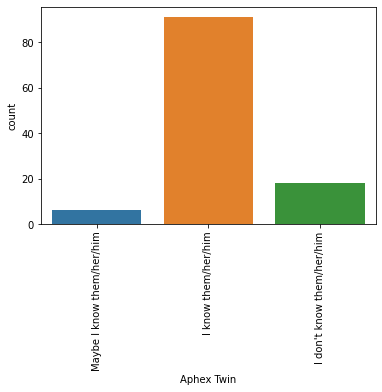

In [61]:
plt.xticks(rotation=90)
sns.countplot(df['Aphex Twin'])

In [62]:
mode = df['Aphex Twin'].mode()[0]
df['Aphex Twin'] = df['Aphex Twin'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Aphex Twin'] = le.fit_transform(df['Aphex Twin'])

In [63]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Aphex Twin']=df['Aphex Twin'].map(color_n)

## Roni Size

In [64]:
df['Roni Size'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Roni Size', ylabel='count'>

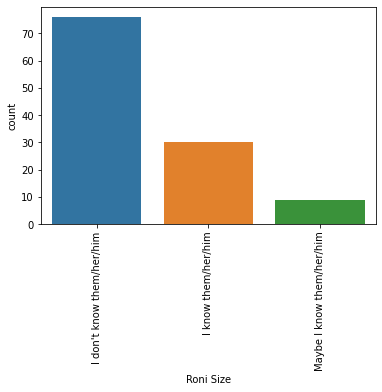

In [65]:
plt.xticks(rotation=90)
sns.countplot(df['Roni Size'])

In [66]:
mode = df['Roni Size'].mode()[0]
df['Roni Size'] = df['Roni Size'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Roni Size'] = le.fit_transform(df['Roni Size'])

In [67]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Roni Size']=df['Roni Size'].map(color_n)

## Underworld

In [68]:
df['Underworld'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Underworld', ylabel='count'>

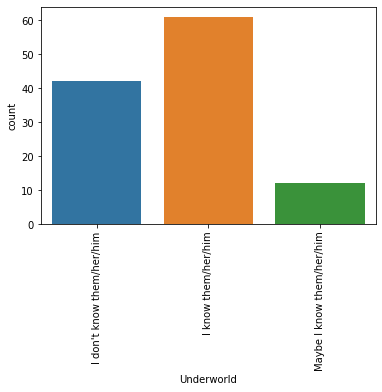

In [69]:
plt.xticks(rotation=90)
sns.countplot(df['Underworld'])

In [70]:
mode = df['Underworld'].mode()[0]
df['Underworld'] = df['Underworld'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Underworld'] = le.fit_transform(df['Underworld'])

In [71]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Underworld']=df['Underworld'].map(color_n)

## Vangelis

In [72]:
df['Vangelis'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vangelis', ylabel='count'>

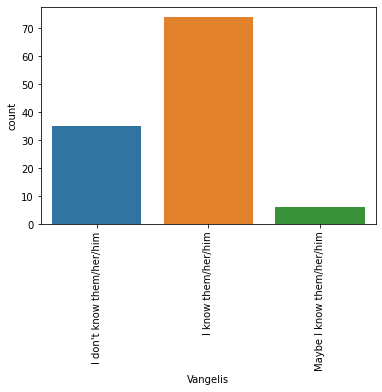

In [73]:
plt.xticks(rotation=90)
sns.countplot(df['Vangelis'])

In [74]:
mode = df['Vangelis'].mode()[0]
df['Vangelis'] = df['Vangelis'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Vangelis'] = le.fit_transform(df['Vangelis'])

In [75]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Vangelis']=df['Vangelis'].map(color_n)

## Moby

In [76]:
df['Moby'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Moby', ylabel='count'>

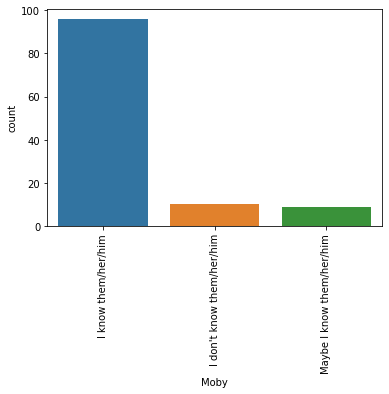

In [77]:
plt.xticks(rotation=90)
sns.countplot(df['Moby'])

In [78]:
mode = df['Moby'].mode()[0]
df['Moby'] = df['Moby'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Moby'] = le.fit_transform(df['Moby'])

In [79]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Moby']=df['Moby'].map(color_n)

## The Prodigy

In [80]:
df['The Prodigy'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='The Prodigy', ylabel='count'>

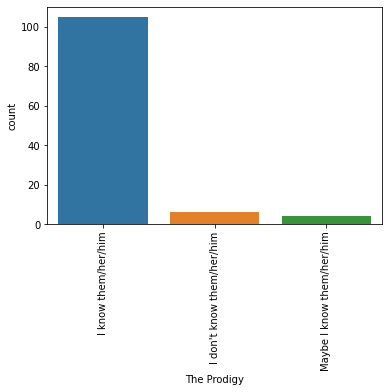

In [81]:
plt.xticks(rotation=90)
sns.countplot(df['The Prodigy'])

In [82]:
mode = df['The Prodigy'].mode()[0]
df['The Prodigy'] = df['The Prodigy'].replace('Maybe I know them/her/him', mode)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['The Prodigy'] = le.fit_transform(df['The Prodigy'])

In [83]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['The Prodigy']=df['The Prodigy'].map(color_n)

## Goldie

In [84]:
df['Goldie'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Goldie', ylabel='count'>

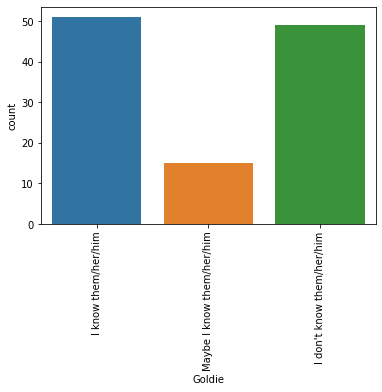

In [85]:
plt.xticks(rotation=90)
sns.countplot(df['Goldie'])

In [86]:
mode = df['Goldie'].mode()[0]
df['Goldie'] = df['Goldie'].replace('Maybe I know them/her/him', mode)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Goldie'] = le.fit_transform(df['Goldie'])

In [87]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Goldie']=df['Goldie'].map(color_n)

## Orbital

In [88]:
df['Orbital'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Orbital', ylabel='count'>

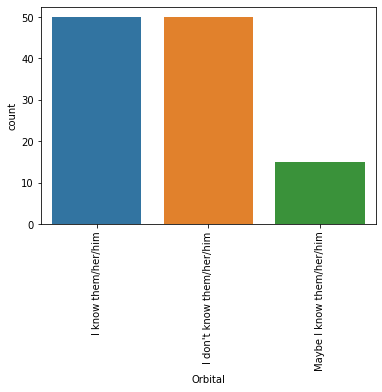

In [89]:
plt.xticks(rotation=90)
sns.countplot(df['Orbital'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Orbital'] = le.fit_transform(df['Orbital'])

In [90]:
mode = df['Orbital'].mode()[0]
df['Orbital'] = df['Orbital'].replace('Maybe I know them/her/him', mode)

In [91]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Orbital']=df['Orbital'].map(color_n)

## Skrillex

In [92]:
df['Skrillex'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Skrillex', ylabel='count'>

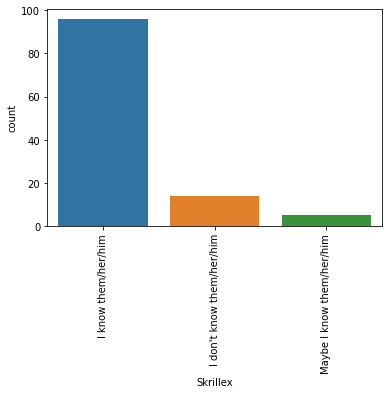

In [93]:
plt.xticks(rotation=90)
sns.countplot(df['Skrillex'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Skrillex'] = le.fit_transform(df['Skrillex'])

In [94]:
mode = df['Skrillex'].mode()[0]
df['Skrillex'] = df['Skrillex'].replace('Maybe I know them/her/him', mode)

In [95]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Skrillex']=df['Skrillex'].map(color_n)

## Deadmau5

In [96]:
df['Deadmau5'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deadmau5', ylabel='count'>

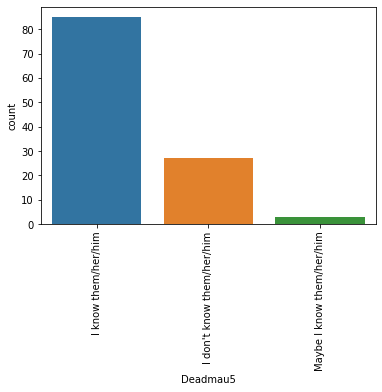

In [97]:
plt.xticks(rotation=90)
sns.countplot(df['Deadmau5'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Deadmau5'] = le.fit_transform(df['Deadmau5'])

In [98]:
mode = df['Deadmau5'].mode()[0]
df['Deadmau5'] = df['Deadmau5'].replace('Maybe I know them/her/him', mode)

In [99]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Deadmau5']=df['Deadmau5'].map(color_n)

## Nur Jaber

In [100]:
df['Nur Jaber'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nur Jaber', ylabel='count'>

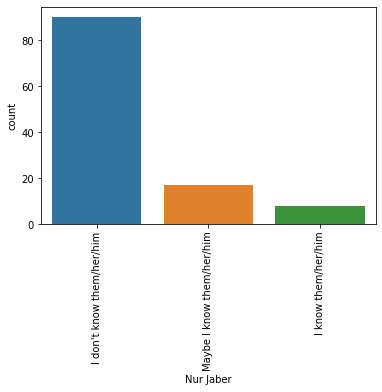

In [101]:
plt.xticks(rotation=90)
sns.countplot(df['Nur Jaber'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Nur Jaber'] = le.fit_transform(df['Nur Jaber'])

In [102]:
mode = df['Nur Jaber'].mode()[0]
df['Nur Jaber'] = df['Nur Jaber'].replace('Maybe I know them/her/him', mode)

In [103]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Nur Jaber']=df['Nur Jaber'].map(color_n)

## DJ Rachael

In [104]:
df['DJ Rachael'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DJ Rachael', ylabel='count'>

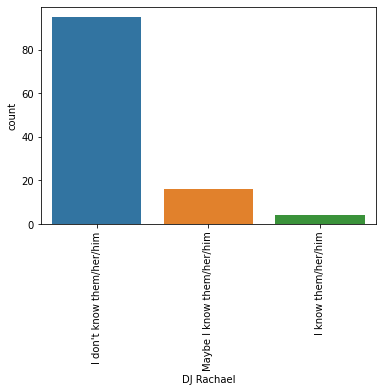

In [105]:
plt.xticks(rotation=90)
sns.countplot(df['DJ Rachael'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DJ Rachael'] = le.fit_transform(df['DJ Rachael'])

In [106]:
mode = df['DJ Rachael'].mode()[0]
df['DJ Rachael'] = df['DJ Rachael'].replace('Maybe I know them/her/him', mode)

In [107]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['DJ Rachael']=df['DJ Rachael'].map(color_n)

## Deena Abdelwahed

In [108]:
df['Deena Abdelwahed'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deena Abdelwahed', ylabel='count'>

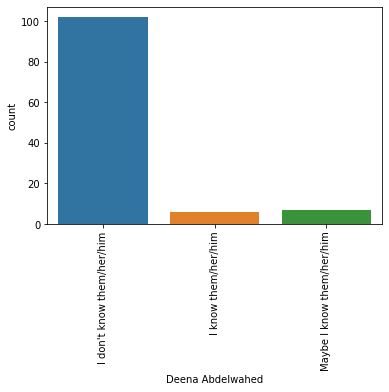

In [109]:
plt.xticks(rotation=90)
sns.countplot(df['Deena Abdelwahed'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Deena Abdelwahed'] = le.fit_transform(df['Deena Abdelwahed'])

In [110]:
mode = df['Deena Abdelwahed'].mode()[0]
df['Deena Abdelwahed'] = df['Deena Abdelwahed'].replace('Maybe I know them/her/him', mode)

In [111]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Deena Abdelwahed']=df['Deena Abdelwahed'].map(color_n)

## Loraine James

In [112]:
df['Loraine James'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loraine James', ylabel='count'>

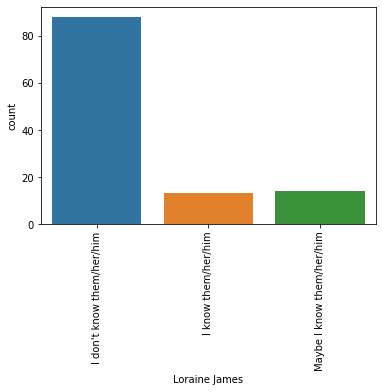

In [113]:
plt.xticks(rotation=90)
sns.countplot(df['Loraine James'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loraine James'] = le.fit_transform(df['Loraine James'])

In [114]:
mode = df['Loraine James'].mode()[0]
df['Loraine James'] = df['Loraine James'].replace('Maybe I know them/her/him', mode)

In [115]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Loraine James']=df['Loraine James'].map(color_n)

## Ibaaku

In [116]:
df['Ibaaku'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ibaaku', ylabel='count'>

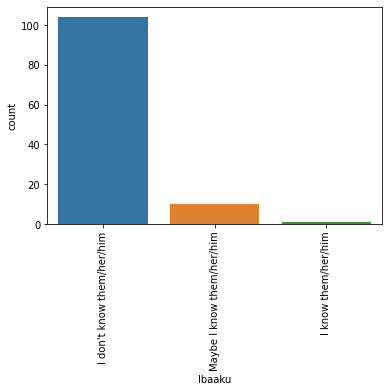

In [117]:
plt.xticks(rotation=90)
sns.countplot(df['Ibaaku'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ibaaku'] = le.fit_transform(df['Ibaaku'])

In [118]:
mode = df['Ibaaku'].mode()[0]
df['Ibaaku'] = df['Ibaaku'].replace('Maybe I know them/her/him', mode)

In [119]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Ibaaku']=df['Ibaaku'].map(color_n)

## Lafidki

In [120]:
df['Lafidki'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lafidki', ylabel='count'>

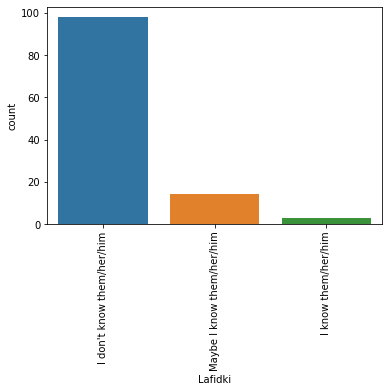

In [121]:
plt.xticks(rotation=90)
sns.countplot(df['Lafidki'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Lafidki'] = le.fit_transform(df['Lafidki'])

In [122]:
mode = df['Lafidki'].mode()[0]
df['Lafidki'] = df['Lafidki'].replace('Maybe I know them/her/him', mode)

In [123]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Lafidki']=df['Lafidki'].map(color_n)

## Upgrayedd Smurphy

In [124]:
df['Upgrayedd Smurphy'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Upgrayedd Smurphy', ylabel='count'>

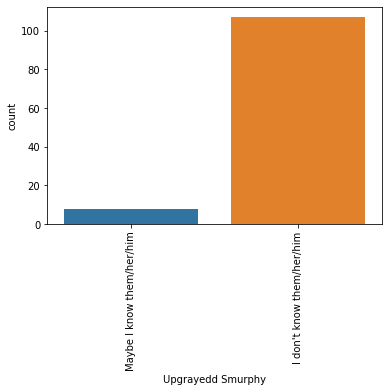

In [125]:
plt.xticks(rotation=90)
sns.countplot(df['Upgrayedd Smurphy'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Upgrayedd Smurphy'] = le.fit_transform(df['Upgrayedd Smurphy'])

In [126]:
color_n = {"Maybe I know them/her/him":1,"I don't know them/her/him":0}
df['Upgrayedd Smurphy']=df['Upgrayedd Smurphy'].map(color_n)

## Sandunes

In [127]:
df['Sandunes'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sandunes', ylabel='count'>

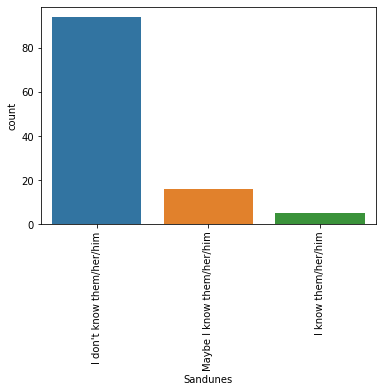

In [128]:
plt.xticks(rotation=90)
sns.countplot(df['Sandunes'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sandunes'] = le.fit_transform(df['Sandunes'])

In [129]:
mode = df['Sandunes'].mode()[0]
df['Sandunes'] = df['Sandunes'].replace('Maybe I know them/her/him', mode)

In [130]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Sandunes']=df['Sandunes'].map(color_n)

## Kerano

In [131]:
df['Kerano'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kerano', ylabel='count'>

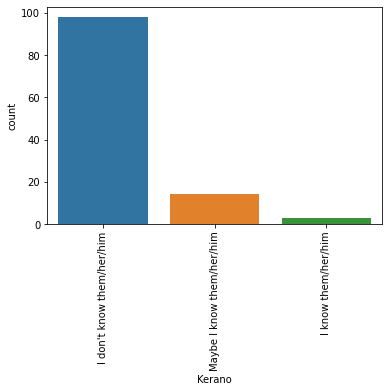

In [132]:
plt.xticks(rotation=90)
sns.countplot(df['Kerano'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Kerano'] = le.fit_transform(df['Kerano'])

In [133]:
mode = df['Kerano'].mode()[0]
df['Kerano'] = df['Kerano'].replace('Maybe I know them/her/him', mode)

In [134]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Kerano']=df['Kerano'].map(color_n)

## Kamila Govorčin

In [135]:
df['Kamila Govorčin'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kamila Govorčin', ylabel='count'>

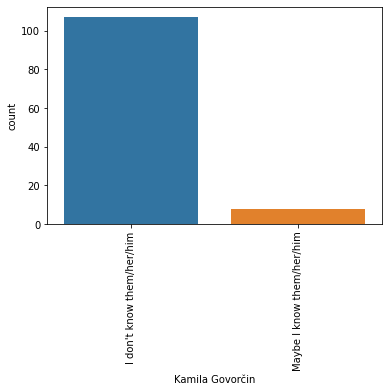

In [136]:
plt.xticks(rotation=90)
sns.countplot(df['Kamila Govorčin'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Kamila Govorčin'] = le.fit_transform(df['Kamila Govorčin'])

In [137]:
color_n = {"Maybe I know them/her/him":1,"I don't know them/her/him":0}
df['Kamila Govorčin']=df['Kamila Govorčin'].map(color_n)

## Echo Deep

In [138]:
df['Echo Deep'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Echo Deep', ylabel='count'>

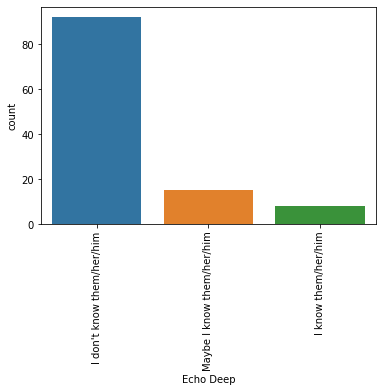

In [139]:
plt.xticks(rotation=90)
sns.countplot(df['Echo Deep'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Echo Deep'] = le.fit_transform(df['Echo Deep'])

In [140]:
mode = df['Echo Deep'].mode()[0]
df['Echo Deep'] = df['Echo Deep'].replace('Maybe I know them/her/him', mode)

In [141]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Echo Deep']=df['Echo Deep'].map(color_n)

## Faded Ghost

In [142]:
df['Faded Ghost'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Faded Ghost', ylabel='count'>

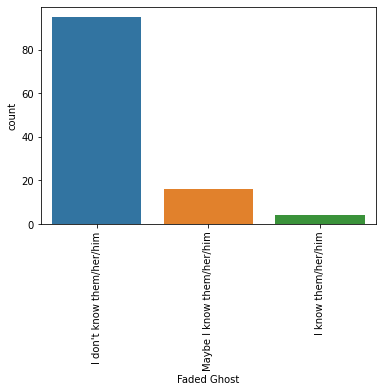

In [143]:
plt.xticks(rotation=90)
sns.countplot(df['Faded Ghost'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Faded Ghost'] = le.fit_transform(df['Faded Ghost'])

In [144]:
mode = df['Faded Ghost'].mode()[0]
df['Faded Ghost'] = df['Faded Ghost'].replace('Maybe I know them/her/him', mode)

In [145]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Faded Ghost']=df['Faded Ghost'].map(color_n)

## AYN

In [146]:
df['AYN'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AYN', ylabel='count'>

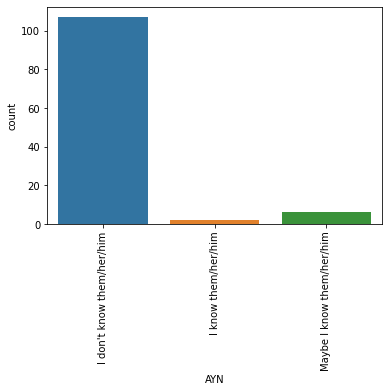

In [147]:
plt.xticks(rotation=90)
sns.countplot(df['AYN'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AYN'] = le.fit_transform(df['AYN'])

In [148]:
mode = df['AYN'].mode()[0]
df['AYN'] = df['AYN'].replace('Maybe I know them/her/him', mode)

In [149]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['AYN']=df['AYN'].map(color_n)

## Amine K

In [150]:
df['Amine K'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amine K', ylabel='count'>

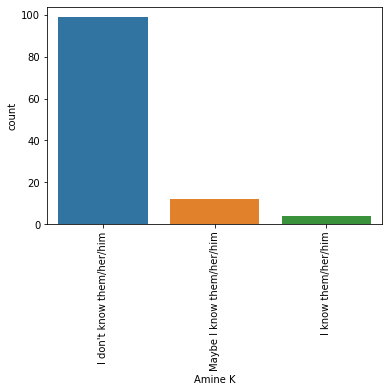

In [151]:
plt.xticks(rotation=90)
sns.countplot(df['Amine K'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Amine K'] = le.fit_transform(df['Amine K'])

In [152]:
mode = df['Amine K'].mode()[0]
df['Amine K'] = df['Amine K'].replace('Maybe I know them/her/him', mode)

In [153]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Amine K']=df['Amine K'].map(color_n)

## Dj Rashad

In [154]:
df['Dj Rashad'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dj Rashad', ylabel='count'>

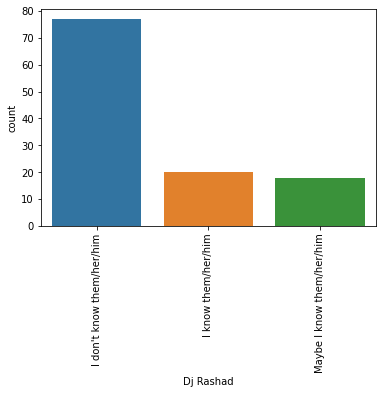

In [155]:
plt.xticks(rotation=90)
sns.countplot(df['Dj Rashad'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dj Rashad'] = le.fit_transform(df['Dj Rashad'])

In [156]:
mode = df['Dj Rashad'].mode()[0]
df['Dj Rashad'] = df['Dj Rashad'].replace('Maybe I know them/her/him', mode)

In [157]:
color_n = {"I know them/her/him":1,"I don't know them/her/him":0}
df['Dj Rashad']=df['Dj Rashad'].map(color_n)

## Familiarity Score

In [158]:
df['Familiarity Score'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Familiarity Score', ylabel='Density'>

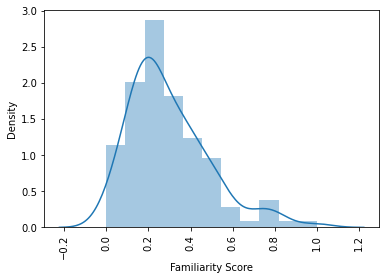

In [159]:
plt.xticks(rotation=90)
sns.distplot(df['Familiarity Score'])

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Familiarity Score'>

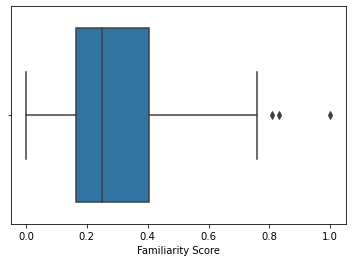

In [160]:
sns.boxplot(df['Familiarity Score'])

In [161]:
#filling outliers 
q1=df['Familiarity Score'].quantile(0.25)
q3=df['Familiarity Score'].quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
df['Familiarity Score']=np.where(df['Familiarity Score']>upper,upper,df['Familiarity Score'])

## TRACK task 1

In [162]:
df['TRACK task 1'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRACK task 1', ylabel='count'>

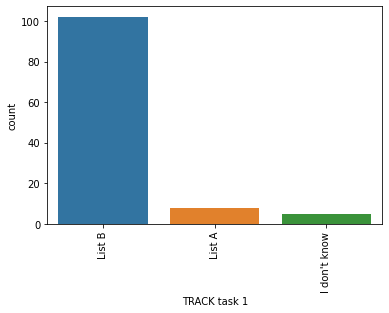

In [163]:
plt.xticks(rotation=90)
sns.countplot(df['TRACK task 1'])

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TRACK task 1'] = le.fit_transform(df['TRACK task 1'])

## TRACK task 2

In [165]:
df['TRACK task 2'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRACK task 2', ylabel='count'>

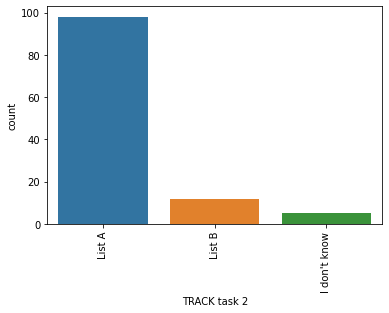

In [166]:
plt.xticks(rotation=90)
sns.countplot(df['TRACK task 2'])

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TRACK task 2'] = le.fit_transform(df['TRACK task 2'])

## TRACK task 3

In [168]:
df['TRACK task 3'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRACK task 3', ylabel='count'>

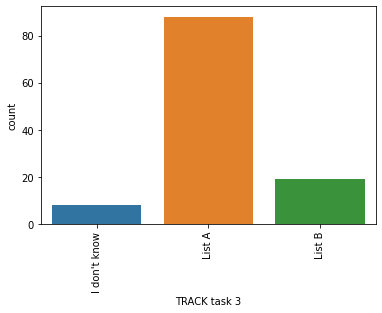

In [169]:
plt.xticks(rotation=90)
sns.countplot(df['TRACK task 3'])

In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TRACK task 3'] = le.fit_transform(df['TRACK task 3'])

## TRACK task 4

In [171]:
df['TRACK task 4'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRACK task 4', ylabel='count'>

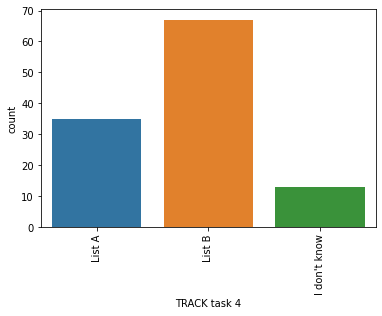

In [172]:
plt.xticks(rotation=90)
sns.countplot(df['TRACK task 4'])

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TRACK task 4'] = le.fit_transform(df['TRACK task 4'])

## Looking back at your choices, I\nNdicate what influenced you the most.

In [174]:
df['Looking back at your choices, I\nNdicate what influenced you the most.'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, I\nNdicate what influenced you the most.', ylabel='count'>

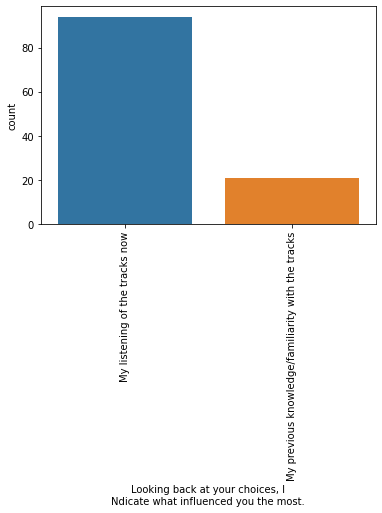

In [175]:
plt.xticks(rotation=90)
sns.countplot(df['Looking back at your choices, I\nNdicate what influenced you the most.'])

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Looking back at your choices, I\nNdicate what influenced you the most.'] = le.fit_transform(df['Looking back at your choices, I\nNdicate what influenced you the most.'])

## Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)

In [177]:
df['Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)'].isnull().sum()

0

In [178]:
df['Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)'].value_counts()

Strong influence    49
Medium influence    43
Weak influence      19
No influence         4
Name: Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow), dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)', ylabel='count'>

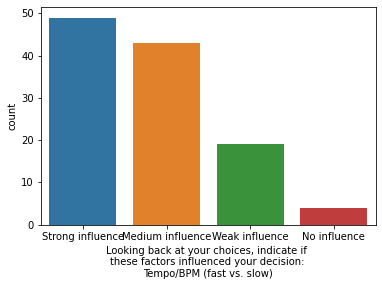

In [179]:
sns.countplot(df['Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)'])

In [180]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)']=df['Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles

In [181]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles'].isnull().sum()

0

In [182]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles'].value_counts()

Strong influence    68
Medium influence    26
Weak influence      15
No influence         6
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles', ylabel='count'>

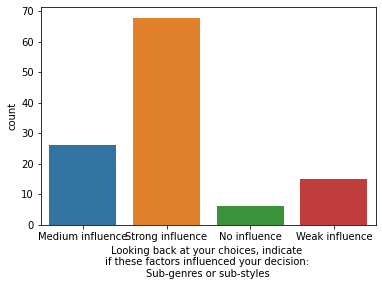

In [183]:
sns.countplot(df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles'])

In [184]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood

In [185]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood'].isnull().sum()

0

In [186]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood'].value_counts()

Strong influence    44
Medium influence    37
Weak influence      24
No influence        10
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood', ylabel='count'>

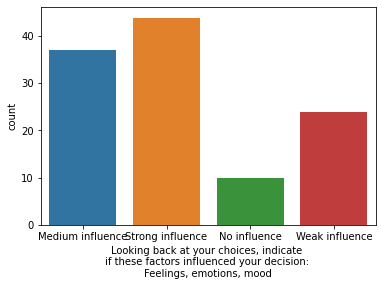

In [187]:
sns.countplot(df['Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood'])

In [188]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples

In [189]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].isnull().sum()

0

In [190]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].value_counts()

Strong influence    53
Medium influence    43
Weak influence      16
No influence         3
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples', ylabel='count'>

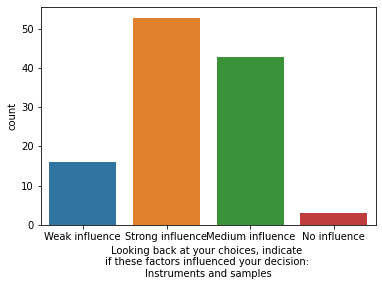

In [191]:
sns.countplot(df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'])

In [192]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples

In [193]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].isnull().sum()

0

In [194]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].value_counts()

3    53
2    43
1    16
0     3
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples, dtype: int64

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples', ylabel='count'>

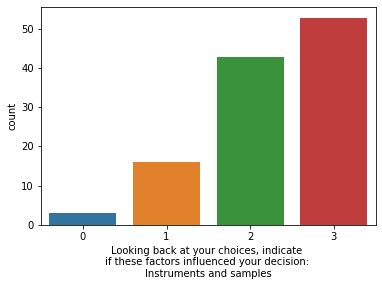

In [195]:
sns.countplot(df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'])

In [196]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples

In [197]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples'].isnull().sum()

115

In [198]:
df.drop('Looking back at your choices, indicate \nif these factors influenced your decision: \nInstruments and samples',axis=1,inplace=True)

## If other factors influenced your choices, \nPlease specify them

In [199]:
df['If other factors influenced your choices, \nPlease specify them'].isnull().sum()

91

In [200]:
df.drop('If other factors influenced your choices, \nPlease specify them',axis=1,inplace=True)

## ARTIST task 1

In [201]:
df['ARTIST task 1'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARTIST task 1', ylabel='count'>

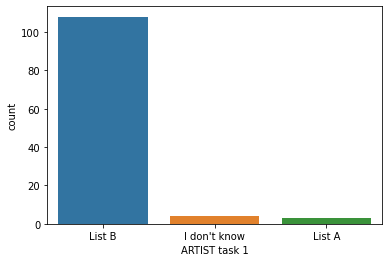

In [202]:
sns.countplot(df['ARTIST task 1'])

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ARTIST task 1'] = le.fit_transform(df['ARTIST task 1'])

## ARTIST task 2

In [204]:
df['ARTIST task 2'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARTIST task 2', ylabel='count'>

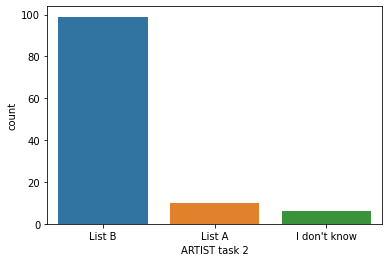

In [205]:
sns.countplot(df['ARTIST task 2'])

In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ARTIST task 2'] = le.fit_transform(df['ARTIST task 2'])

## ARTIST task 3

In [207]:
df['ARTIST task 3'].isnull().sum()

0

In [208]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ARTIST task 3'] = le.fit_transform(df['ARTIST task 3'])

## ARTIST task 4

In [209]:
df['ARTIST task 4'].isnull().sum()

0

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ARTIST task 4'] = le.fit_transform(df['ARTIST task 4'])

## Looking back at your choices, \nIndicate what influenced you the most

In [211]:
df['Looking back at your choices, \nIndicate what influenced you the most.'].isnull().sum()

0

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Looking back at your choices, \nIndicate what influenced you the most.', ylabel='count'>

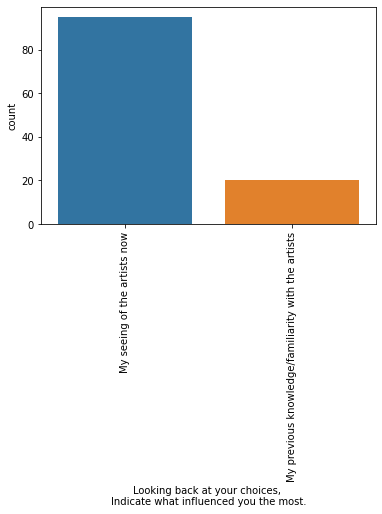

In [212]:
plt.xticks(rotation=90)
sns.countplot(df['Looking back at your choices, \nIndicate what influenced you the most.'])

In [213]:
df['Looking back at your choices, \nIndicate what influenced you the most.'].value_counts()

My seeing of the artists now                          95
My previous knowledge/familiarity with the artists    20
Name: Looking back at your choices, \nIndicate what influenced you the most., dtype: int64

In [214]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Looking back at your choices, \nIndicate what influenced you the most.'] = le.fit_transform(df['Looking back at your choices, \nIndicate what influenced you the most.'])

## Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type

In [215]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type'].isnull().sum()

0

In [216]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type'].value_counts()

Strong influence    56
Medium influence    33
Weak influence      16
No influence        10
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type, dtype: int64

In [217]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation

In [218]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation'].isnull().sum()

0

In [219]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation'].value_counts()

Strong influence    61
Medium influence    30
No influence        15
Weak influence       9
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation, dtype: int64

In [220]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nAge

In [221]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nAge'].value_counts()

No influence        57
Weak influence      43
Medium influence    11
Strong influence     4
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nAge, dtype: int64

In [222]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nAge'].isnull().sum()

0

In [223]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nAge']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nAge'].map(color_n)

## Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin

In [224]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin'].isnull().sum()

0

In [225]:
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin'].value_counts()

Strong influence    62
Medium influence    32
Weak influence      12
No influence         9
Name: Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin, dtype: int64

In [226]:
color_n = {'No influence':0,'Weak influence':1,'Medium influence':2,'Strong influence':3}
df['Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin']=df['Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin'].map(color_n)

## If other factors influenced your choices, \nplease specify them:

In [227]:
df['If other factors influenced your choices, \nplease specify them:'].isnull().sum()

96

In [228]:
df.drop('If other factors influenced your choices, \nplease specify them:',axis=1,inplace=True)

## BOTH task 1

In [229]:
df['BOTH task 1'].isnull().sum()

0

In [230]:
df['BOTH task 1'].value_counts()

List B          80
List A          22
I don't know    13
Name: BOTH task 1, dtype: int64

In [231]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BOTH task 1'] = le.fit_transform(df['BOTH task 1'])

## BOTH task 2

In [232]:
df['BOTH task 2'].isnull().sum()

0

In [233]:
df['BOTH task 2'].value_counts()

List B          83
List A          21
I don't know    11
Name: BOTH task 2, dtype: int64

In [234]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BOTH task 2'] = le.fit_transform(df['BOTH task 2'])

## BOTH task 3

In [235]:
df['BOTH task 3'].isnull().sum()

0

In [236]:
df['BOTH task 3'].value_counts()

List B          57
List A          50
I don't know     7
Lista B          1
Name: BOTH task 3, dtype: int64

In [237]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BOTH task 3'] = le.fit_transform(df['BOTH task 3'])

## BOTH task 4

In [238]:
df['BOTH task 4'].isnull().sum()

0

In [239]:
df['BOTH task 4'].value_counts()

List A          63
List B          38
I don't know    14
Name: BOTH task 4, dtype: int64

In [240]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['BOTH task 4'] = le.fit_transform(df['BOTH task 4'])

## Looking back at your choices, \nIndicate what influenced you the most..1

In [241]:
df['Looking back at your choices, \nIndicate what influenced you the most..1'].isnull().sum()

0

In [242]:
df['Looking back at your choices, \nIndicate what influenced you the most..1'].value_counts()

My listening of the tracks and seeing of the artists now             99
My previous knowledge/familiarity with the tracks and the artists    16
Name: Looking back at your choices, \nIndicate what influenced you the most..1, dtype: int64

In [243]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Looking back at your choices, \nIndicate what influenced you the most..1'] = le.fit_transform(df['Looking back at your choices, \nIndicate what influenced you the most..1'])

### After re running by removing certain features. i understood that removing certain columns will increase the performance

In [244]:
df.drop(['Musical_training','produce_music? '],axis=1,inplace=True)

In [245]:
df.drop('Do you often \nListen to Electronic Music?',axis=1,inplace=True)

In [246]:
#df.drop('Familiarity Score',axis=1,inplace=True)  #checking

In [247]:
df.drop('Qualification',axis=1,inplace=True)  #checking increased 1 percent 

In [248]:
df.drop('Looking back at your choices, indicate \nif these factors influenced your decision: \nRace / color / skin type',axis=1,inplace=True) #checking 6% increase

In [249]:
pd.set_option("display.max_columns", None)

df.head()

,Age,Gender,\nskin type?,Location,Would you describe \nYour musical taste as varied?,"Within Electronic music, \nWould you describe your musical taste as varied?",Kraftwerk,Daft Punk,Tangerine Dream,The Chemical Brothers,DJ Shadow,Aphex Twin,Roni Size,Underworld,Vangelis,Moby,The Prodigy,Goldie,Orbital,Skrillex,Deadmau5,Nur Jaber,DJ Rachael,Deena Abdelwahed,Loraine James,Ibaaku,Lafidki,Upgrayedd Smurphy,Sandunes,Kerano,Kamila Govorčin,Echo Deep,Faded Ghost,AYN,Amine K,Dj Rashad,Familiarity Score,TRACK task 1,TRACK task 2,TRACK task 3,TRACK task 4,"Looking back at your choices, I\nNdicate what influenced you the most.","Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)","Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles","Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood",ARTIST task 1,ARTIST task 2,ARTIST task 3,ARTIST task 4,"Looking back at your choices, \nIndicate what influenced you the most.","Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation","Looking back at your choices, indicate \nif these factors influenced your decision: \nAge","Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin",BOTH task 1,BOTH task 2,BOTH task 3,BOTH task 4,"Looking back at your choices, \nIndicate what influenced you the most..1","Looking back at your choices, \nWhich one did you weight the most"
0,2,1,4,5,5,3,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.24,2,1,0,1,0,3,2,2,2,2,0,0,1,3,3,3,1,2,2,2,1,2
1,3,0,1,2,5,5,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.49,2,1,0,2,1,3,3,2,2,2,1,1,0,2,0,3,2,2,1,0,0,3
2,1,1,1,2,4,4,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.36,2,1,1,2,1,2,3,2,2,2,1,2,1,3,1,2,2,2,2,1,0,4
3,4,1,2,2,5,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,2,1,1,2,0,2,0,2,2,2,1,2,1,3,0,3,2,2,1,1,0,3
4,2,1,1,2,5,5,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.20,2,1,1,2,0,3,1,3,2,2,1,2,1,3,1,3,2,2,1,2,0,3


# PCA

In [250]:
from sklearn.decomposition import PCA

In [251]:
# Create a PCA object with the number of components you want
pca = PCA(n_components = 2)

In [252]:
pca.fit(df)

PCA(n_components=2)

In [253]:
PCA_df= pca.transform(df)

In [254]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.03911365 -0.0281051  -0.05456152  0.01949384 -0.42884891 -0.69071034
  -0.11373248 -0.01685338 -0.09477022 -0.04782646 -0.17975257 -0.10634563
  -0.09360282 -0.13473914 -0.10244331 -0.07722473 -0.03312118 -0.13276097
  -0.15605813 -0.06463855 -0.13194893 -0.02664345 -0.02288536 -0.00849609
  -0.01670816 -0.003051   -0.01569112 -0.01058173 -0.0305029  -0.00360886
  -0.01146168 -0.03311225 -0.02613543 -0.01672243 -0.02325595 -0.08025749
  -0.06390935 -0.03568226 -0.05622184 -0.04407939 -0.04514465 -0.03960108
   0.08353385 -0.18162782 -0.2096922   0.04202866  0.01243586  0.01142937
   0.09280247  0.05938366  0.16126622 -0.00344078 -0.01376409 -0.04866895
   0.00618347 -0.00961277 -0.00855034 -0.03444894 -0.05433068]
 [-0.30211598  0.03542591  0.32115623 -0.10248647 -0.15145716 -0.01470591
   0.0066241   0.00352485 -0.05628369  0.00224098 -0.01536874 -0.02423911
  -0.07714527 -0.02023444 -0.04036939 -0.0371157  -0.01012058 -0.09502492
  -0.10103045  0.00742395 -0.01104308 -0.03211746

In [255]:
PCA_df

array([[ 3.86423784e-01, -9.50440697e-01],
       [-1.57764473e+00, -5.88673070e-01],
       [-4.26940753e-01, -6.44896738e-02],
       [-1.18082381e+00, -1.69328689e+00],
       [-8.58147932e-01, -1.52291377e+00],
       [-3.06054827e-01, -8.40414424e-01],
       [-6.86964742e-01, -1.21506297e-01],
       [ 5.51161652e-01,  7.28123314e-01],
       [-1.31148225e+00, -1.17044860e+00],
       [-1.10510144e+00,  5.78310481e-01],
       [ 3.43429984e-01,  1.06640585e+00],
       [ 1.19834660e+00, -4.88767377e-01],
       [-9.67692166e-01,  8.66643532e-01],
       [-1.21077858e-01,  8.32030506e-01],
       [ 1.95856487e+00,  5.94514758e-01],
       [-1.99654318e+00,  3.76338621e-01],
       [-5.40366223e-01, -1.06998960e+00],
       [-5.85977561e-01, -1.34428517e+00],
       [-6.54965011e-01, -9.50607788e-01],
       [ 1.92700248e+00,  3.46956518e-01],
       [-4.24311569e-01,  2.90011526e-01],
       [-3.52402487e-01, -1.18222527e-01],
       [-8.78916995e-02, -6.60879670e-01],
       [-1.

## ELBOW METHOD

In [256]:
from sklearn.cluster import KMeans

In [257]:
wcss = []
for k in range(1, 11):
    # Create a KMeans object with k clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

C:\Users\jonah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [258]:
wcss

[483.8328656153514,
 308.40761767344213,
 208.3473789930683,
 155.33940711895443,
 121.52026626940226,
 95.80311314630316,
 75.42409919694674,
 60.4238088774478,
 51.41124568140009,
 44.466012442207884]

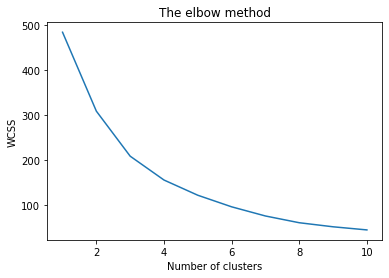

In [259]:
# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')
plt.show()

## KMeans CLUSTER

In [260]:
from sklearn.cluster import KMeans

In [261]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(PCA_df)


KMeans(n_clusters=3)

In [262]:
labels = kmeans.predict(PCA_df)

## silhouette_score


In [263]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [264]:
score = silhouette_score(PCA_df, labels)

#### Score

In [265]:
print('The average silhouette score is:', score) #bad score

The average silhouette score is: 0.3727435225518126


In [266]:
scores = silhouette_samples(PCA_df, labels)

In [267]:
print('The silhouette scores for each data point are:', scores)

The silhouette scores for each data point are: [ 0.57678264  0.23225829  0.36278635  0.4632636   0.51180343  0.56494114
  0.31309953  0.17002702  0.42364161  0.26466131 -0.00535055  0.19909781
  0.35786442  0.02791673  0.44194833  0.29585005  0.55223209  0.54726384
  0.53074423  0.41166602  0.16970064  0.40208835  0.56549242  0.3050381
  0.05091882  0.20476996  0.45596373  0.49530341  0.25728137  0.45495582
  0.52623443  0.52086536  0.5760962   0.25695859  0.23862503  0.29104094
  0.56896623  0.4927948   0.35575387  0.58466253  0.04150881  0.34083137
  0.40311013  0.57299389  0.04000583  0.13946333  0.21897308  0.35309704
  0.49345851  0.4018517  -0.01487023  0.16857478  0.5053081   0.12324412
  0.5129543   0.36650567  0.33698649  0.51848829  0.46903381  0.33143774
  0.37088666  0.17858063  0.37429741  0.423425    0.423425    0.25586562
  0.51168362  0.39458551  0.33261323  0.54909194  0.44870441  0.423425
  0.43867698  0.19778832  0.423425    0.46939071  0.15006309  0.54404765
  0.180

## HEIRARICAL CLUSTRING 

In [268]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [269]:
    hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [270]:
label = hc.fit_predict(PCA_df)

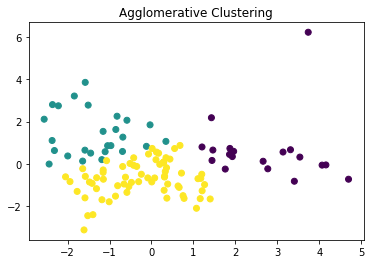

In [271]:
# Plot the data with different colors for each cluster
plt.scatter(PCA_df[:, 0], PCA_df[:, 1], c=labels)
plt.title('Agglomerative Clustering')
plt.show()

In [272]:
# Create a linkage matrix using the same parameters as above
Z = linkage(PCA_df, method='ward', metric='euclidean')

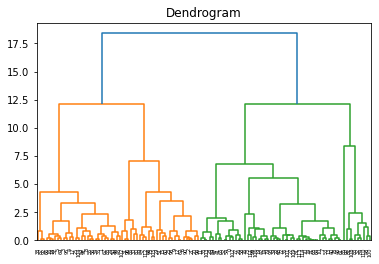

In [273]:
# Plot the dendrogram for the linkage matrix
plt.figure()
dendrogram(Z)
plt.title('Dendrogram')
plt.show()

In [274]:
score = silhouette_score(PCA_df, label)

#### score

In [275]:
score #good model

0.6630622202785674

# In this project, I applied different clustering techniques to a dataset that contains many artist names and other features. The goal was to create a music recommendation system based on people’s interests. I compared the performance of k-means clustering and hierarchical clustering using the silhouette score as a metric. I found that hierarchical clustering achieved a higher silhouette score of 66%, which indicates that the clusters are well separated and cohesive. Therefore, I chose hierarchical clustering as the best model for this project. This model can help to provide personalized music recommendations to users based on their preferences and similarities with other users.

In [276]:
df.head()

,Age,Gender,\nskin type?,Location,Would you describe \nYour musical taste as varied?,"Within Electronic music, \nWould you describe your musical taste as varied?",Kraftwerk,Daft Punk,Tangerine Dream,The Chemical Brothers,DJ Shadow,Aphex Twin,Roni Size,Underworld,Vangelis,Moby,The Prodigy,Goldie,Orbital,Skrillex,Deadmau5,Nur Jaber,DJ Rachael,Deena Abdelwahed,Loraine James,Ibaaku,Lafidki,Upgrayedd Smurphy,Sandunes,Kerano,Kamila Govorčin,Echo Deep,Faded Ghost,AYN,Amine K,Dj Rashad,Familiarity Score,TRACK task 1,TRACK task 2,TRACK task 3,TRACK task 4,"Looking back at your choices, I\nNdicate what influenced you the most.","Looking back at your choices, indicate if \nthese factors influenced your decision: \nTempo/BPM (fast vs. slow)","Looking back at your choices, indicate \nif these factors influenced your decision: \nSub-genres or sub-styles","Looking back at your choices, indicate \nif these factors influenced your decision: \nFeelings, emotions, mood",ARTIST task 1,ARTIST task 2,ARTIST task 3,ARTIST task 4,"Looking back at your choices, \nIndicate what influenced you the most.","Looking back at your choices, indicate \nif these factors influenced your decision: \nSex / gender / sexual orientation","Looking back at your choices, indicate \nif these factors influenced your decision: \nAge","Looking back at your choices, indicate \nif these factors influenced your decision: \nLanguage / nationality / social origin",BOTH task 1,BOTH task 2,BOTH task 3,BOTH task 4,"Looking back at your choices, \nIndicate what influenced you the most..1","Looking back at your choices, \nWhich one did you weight the most"
0,2,1,4,5,5,3,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.24,2,1,0,1,0,3,2,2,2,2,0,0,1,3,3,3,1,2,2,2,1,2
1,3,0,1,2,5,5,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.49,2,1,0,2,1,3,3,2,2,2,1,1,0,2,0,3,2,2,1,0,0,3
2,1,1,1,2,4,4,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.36,2,1,1,2,1,2,3,2,2,2,1,2,1,3,1,2,2,2,2,1,0,4
3,4,1,2,2,5,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,2,1,1,2,0,2,0,2,2,2,1,2,1,3,0,3,2,2,1,1,0,3
4,2,1,1,2,5,5,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.20,2,1,1,2,0,3,1,3,2,2,1,2,1,3,1,3,2,2,1,2,0,3
